EDA And Feature Engineering of Google Play Store Dataset

1. Problem statement : Today 1.85 millions different apps available for users to download. Android users have even more from which to choose, with 2.56 millions available throught the Google play store. These apps have come to play a hug role in the way we live today. 
2. Our objective is to find the most popular category,find the app with largest number of installs, the app with largest size etc.
3. Data collection
The data consists of 20 columns and 10841 rows

##### Steps we are going to follow 

1. Data cleaning
2. Exploratory Data Analysis
3. Feature Engineering

1.  1. Data Cleaning

📌 Goal: Make the data readable, consistent, and usable.

In [66]:
'''

# Step 1.1: Load the data
df = pd.read_csv("file.csv")

# Step 1.2: Check structure
print(df.shape)
print(df.info())

# Step 1.3: Handle missing values
df.isnull().sum()
# -> Drop or fill missing values
df = df.dropna()  # or use df.fillna('value')

# Step 1.4: Handle duplicate rows
df = df.drop_duplicates()

# Step 1.5: Convert data types if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 1.6: Standardize text
df['Category'] = df['Category'].str.strip().str.lower()

# Step 1.7: Fix inconsistent values
print(df['Category'].unique())  # Spot issues like "electronics", "Electronic"


'''

'\n\n# Step 1.1: Load the data\ndf = pd.read_csv("file.csv")\n\n# Step 1.2: Check structure\nprint(df.shape)\nprint(df.info())\n\n# Step 1.3: Handle missing values\ndf.isnull().sum()\n# -> Drop or fill missing values\ndf = df.dropna()  # or use df.fillna(\'value\')\n\n# Step 1.4: Handle duplicate rows\ndf = df.drop_duplicates()\n\n# Step 1.5: Convert data types if needed\ndf[\'Date\'] = pd.to_datetime(df[\'Date\'], errors=\'coerce\')\n\n# Step 1.6: Standardize text\ndf[\'Category\'] = df[\'Category\'].str.strip().str.lower()\n\n# Step 1.7: Fix inconsistent values\nprint(df[\'Category\'].unique())  # Spot issues like "electronics", "Electronic"\n\n\n'

 2. Exploratory Data Analysis (EDA)

📌 Goal: Understand your data — find trends, patterns, outliers, and relationships.

In [67]:
''' 

# Step 2.1: Basic stats
df.describe()
df['Price'].value_counts()
df['Category'].nunique()

# Step 2.2: Univariate Analysis (1 column at a time)
df['Price'].hist()                # For numerical
df['Category'].value_counts().plot(kind='bar')  # For categorical

# Step 2.3: Bivariate Analysis (2 columns)
sns.boxplot(x='Category', y='Price', data=df)
sns.heatmap(df.corr(), annot=True)  # Correlation map

# Step 2.4: Outlier detection
sns.boxplot(df['Price'])

# Step 2.5: Class imbalance
df['Target'].value_counts(normalize=True)



'''

" \n\n# Step 2.1: Basic stats\ndf.describe()\ndf['Price'].value_counts()\ndf['Category'].nunique()\n\n# Step 2.2: Univariate Analysis (1 column at a time)\ndf['Price'].hist()                # For numerical\ndf['Category'].value_counts().plot(kind='bar')  # For categorical\n\n# Step 2.3: Bivariate Analysis (2 columns)\nsns.boxplot(x='Category', y='Price', data=df)\nsns.heatmap(df.corr(), annot=True)  # Correlation map\n\n# Step 2.4: Outlier detection\nsns.boxplot(df['Price'])\n\n# Step 2.5: Class imbalance\ndf['Target'].value_counts(normalize=True)\n\n\n\n"

3. Feature Engineering

📌 Goal: Create smart new columns that make models better!

In [68]:
''' 

# Step 3.1: Date/Time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek

# Step 3.2: Text to numbers (encoding)
df['Gender_encoded'] = df['Gender'].map({'male': 0, 'female': 1})

# Or use OneHotEncoder
df = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Step 3.3: Binning
df['Price_range'] = pd.cut(df['Price'], bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Premium'])

# Step 3.4: Interaction Features
df['Revenue'] = df['Price'] * df['Quantity']

# Step 3.5: Handle skewed data
df['Log_Price'] = np.log1p(df['Price'])  # if Price has outliers or skewness

# Step 3.6: Scaling (before model training)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Price', 'Quantity']] = scaler.fit_transform(df[['Price', 'Quantity']])


'''

" \n\n# Step 3.1: Date/Time features\ndf['Year'] = df['Date'].dt.year\ndf['Month'] = df['Date'].dt.month\ndf['Day'] = df['Date'].dt.day\ndf['Day_of_week'] = df['Date'].dt.dayofweek\n\n# Step 3.2: Text to numbers (encoding)\ndf['Gender_encoded'] = df['Gender'].map({'male': 0, 'female': 1})\n\n# Or use OneHotEncoder\ndf = pd.get_dummies(df, columns=['Category'], drop_first=True)\n\n# Step 3.3: Binning\ndf['Price_range'] = pd.cut(df['Price'], bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Premium'])\n\n# Step 3.4: Interaction Features\ndf['Revenue'] = df['Price'] * df['Quantity']\n\n# Step 3.5: Handle skewed data\ndf['Log_Price'] = np.log1p(df['Price'])  # if Price has outliers or skewness\n\n# Step 3.6: Scaling (before model training)\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ndf[['Price', 'Quantity']] = scaler.fit_transform(df[['Price', 'Quantity']])\n\n\n"

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline 

In [70]:
df=pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [72]:
## stastical summary of dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


##### Insights and Observation
1. Identifying missing values in dataset
2. Handling missing valus

In [73]:
# Identify missing values 
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [74]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [75]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [76]:
df['Reviews'].str.isnumeric().sum()

10840

In [77]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [78]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy=df_copy.drop(df_copy.index[10472])

In [ ]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
## Convert Review Datatype to int 
df_copy['Reviews']=df_copy['Reviews'].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [ ]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df_copy['Size'].str.replace('M','000') ##This line creates a modified version temporarily, but it doesn't save the result in the DataFrame.
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df_copy['Size_in_thousands'] = (
    df_copy['Size']
    .apply(lambda x: str(x).strip().replace(',', ''))  # Clean string
    .apply(lambda x: float(x.replace('M', '')) * 1000 if 'M' in x
           else float(x.replace('k', '')) if 'k' in x
           else np.nan)
)
## df_copy['Size_in_thousands']=df_copy['Size_in_thousands'].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                10840 non-null  object 
 1   Category           10840 non-null  object 
 2   Rating             9366 non-null   float64
 3   Reviews            10840 non-null  int32  
 4   Size               10840 non-null  object 
 5   Installs           10840 non-null  object 
 6   Type               10839 non-null  object 
 7   Price              10840 non-null  object 
 8   Content Rating     10840 non-null  object 
 9   Genres             10840 non-null  object 
 10  Last Updated       10840 non-null  object 
 11  Current Ver        10832 non-null  object 
 12  Android Ver        10838 non-null  object 
 13  Size_in_thousands  9145 non-null   float64
dtypes: float64(2), int32(1), object(11)
memory usage: 1.2+ MB


In [ ]:
''' 
## Another method ## 

df_copy['Size]= df_copy['Size].str.replace('M','000')
df_copy['Size]= df_copy['Size].str.replace('k','')
df_copy['Size]= df_copy['Size].str.replace('Varies with device',np.nan)



'''

" \n## Another method ## \n\ndf_copy['Size]= df_copy['Size].str.replace('M','000')\ndf_copy['Size]= df_copy['Size].str.replace('k','')\ndf_copy['Size]= df_copy['Size].str.replace('Varies with device',np.nan)\n\n\n\n"

In [ ]:
df_copy.describe()

,Rating,Reviews,Size_in_thousands
count,9366.000000,1.084000e+04,9145.000000
mean,4.191757,4.441529e+05,21516.529524
std,0.515219,2.927761e+06,22588.747934
min,1.000000,0.000000e+00,8.500000
25%,4.000000,3.800000e+01,4900.000000
50%,4.300000,2.094000e+03,13000.000000
75%,4.500000,5.477550e+04,30000.000000
max,5.000000,7.815831e+07,100000.000000


In [ ]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
chars_to_remove = [',','+','$']
columns_to_clean = ['Installs','Price']

for char in chars_to_remove:
    for column in columns_to_clean:
        df_copy[column]= df_copy[column].str.replace(char,'')

In [ ]:
df_copy['Installs'].unique()


array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                10840 non-null  object 
 1   Category           10840 non-null  object 
 2   Rating             9366 non-null   float64
 3   Reviews            10840 non-null  int32  
 4   Size               10840 non-null  object 
 5   Installs           10840 non-null  object 
 6   Type               10839 non-null  object 
 7   Price              10840 non-null  object 
 8   Content Rating     10840 non-null  object 
 9   Genres             10840 non-null  object 
 10  Last Updated       10840 non-null  object 
 11  Current Ver        10832 non-null  object 
 12  Android Ver        10838 non-null  object 
 13  Size_in_thousands  9145 non-null   float64
dtypes: float64(2), int32(1), object(11)
memory usage: 1.2+ MB


In [ ]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                10840 non-null  object 
 1   Category           10840 non-null  object 
 2   Rating             9366 non-null   float64
 3   Reviews            10840 non-null  int32  
 4   Size               10840 non-null  object 
 5   Installs           10840 non-null  int32  
 6   Type               10839 non-null  object 
 7   Price              10840 non-null  float64
 8   Content Rating     10840 non-null  object 
 9   Genres             10840 non-null  object 
 10  Last Updated       10840 non-null  object 
 11  Current Ver        10832 non-null  object 
 12  Android Ver        10838 non-null  object 
 13  Size_in_thousands  9145 non-null   float64
dtypes: float64(3), int32(2), object(9)
memory usage: 1.2+ MB


In [ ]:
## Handling last update feature 
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
## separating last update column with datetime feature 

df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [ ]:
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month 
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [ ]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_thousands,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19000.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14000.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8700.0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25000.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2800.0,20,6,2018


In [ ]:
df_copy.to_csv('cleaned_googleplaystore_data.csv')

#### EDA

In [ ]:
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_thousands,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,NaN,26,2,2018
236,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,NaN,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,NaN,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,37000.0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,NaN,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,1400.0,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,4000.0,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60M,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,60000.0,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,12000.0,30,7,2018


In [ ]:
## drop all the duplicated rows 

df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [ ]:
df_copy.shape

(9659, 17)

In [83]:
## Explore data

numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

## print columns
print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\n we have {} categorical features : {}'.format(len(categorical_features),categorical_features))


we have 9 numerical features : ['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated', 'Size_in_thousands', 'Day', 'Month', 'Year']

 we have 8 categorical features : ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [79]:
print(df_copy.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_in_thousands', 'Day', 'Month', 'Year'],
      dtype='object')


In [81]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9659 non-null   object        
 1   Category           9659 non-null   object        
 2   Rating             8196 non-null   float64       
 3   Reviews            9659 non-null   int32         
 4   Size               9659 non-null   object        
 5   Installs           9659 non-null   int32         
 6   Type               9658 non-null   object        
 7   Price              9659 non-null   float64       
 8   Content Rating     9659 non-null   object        
 9   Genres             9659 non-null   object        
 10  Last Updated       9659 non-null   datetime64[ns]
 11  Current Ver        9651 non-null   object        
 12  Android Ver        9657 non-null   object        
 13  Size_in_thousands  8432 non-null   float64       
 14  Day         

## Feature Information

1. App : Name of the App
2. Category : Category under which app falls
3. Rating : Application rating on playstore
4. Reviews : Number of reviews of the App
5. Size : size of the app
6. Installs : Number of installs of the App
7. Type : Type of the App (Paid or Free)
8. Price : Price of the App(0 if it is free)
9. Content Rating : Appropiate target audience of the App
10. Genres: Genre under which the app falls
11. Last updated: Date when the app was last updated
12. current ver : current version of the application
13. android ver : Minimum android version required to run the app


In [84]:
## proportion of count data on categorical columns

for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)
    print('--------------------------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
--------------------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE      

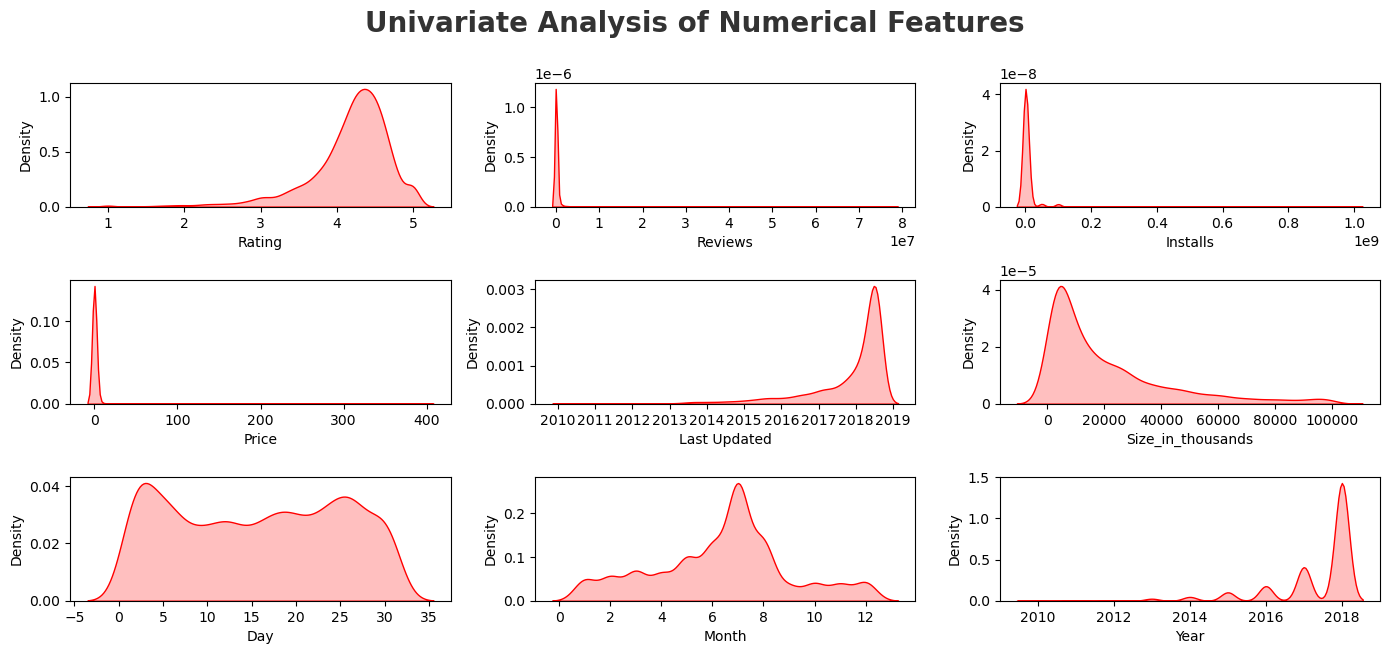

In [88]:
plt.figure(figsize=(14,10))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [ ]:
## observation
## Rating and year is left skewed while reviews,size,install and price are right skewed


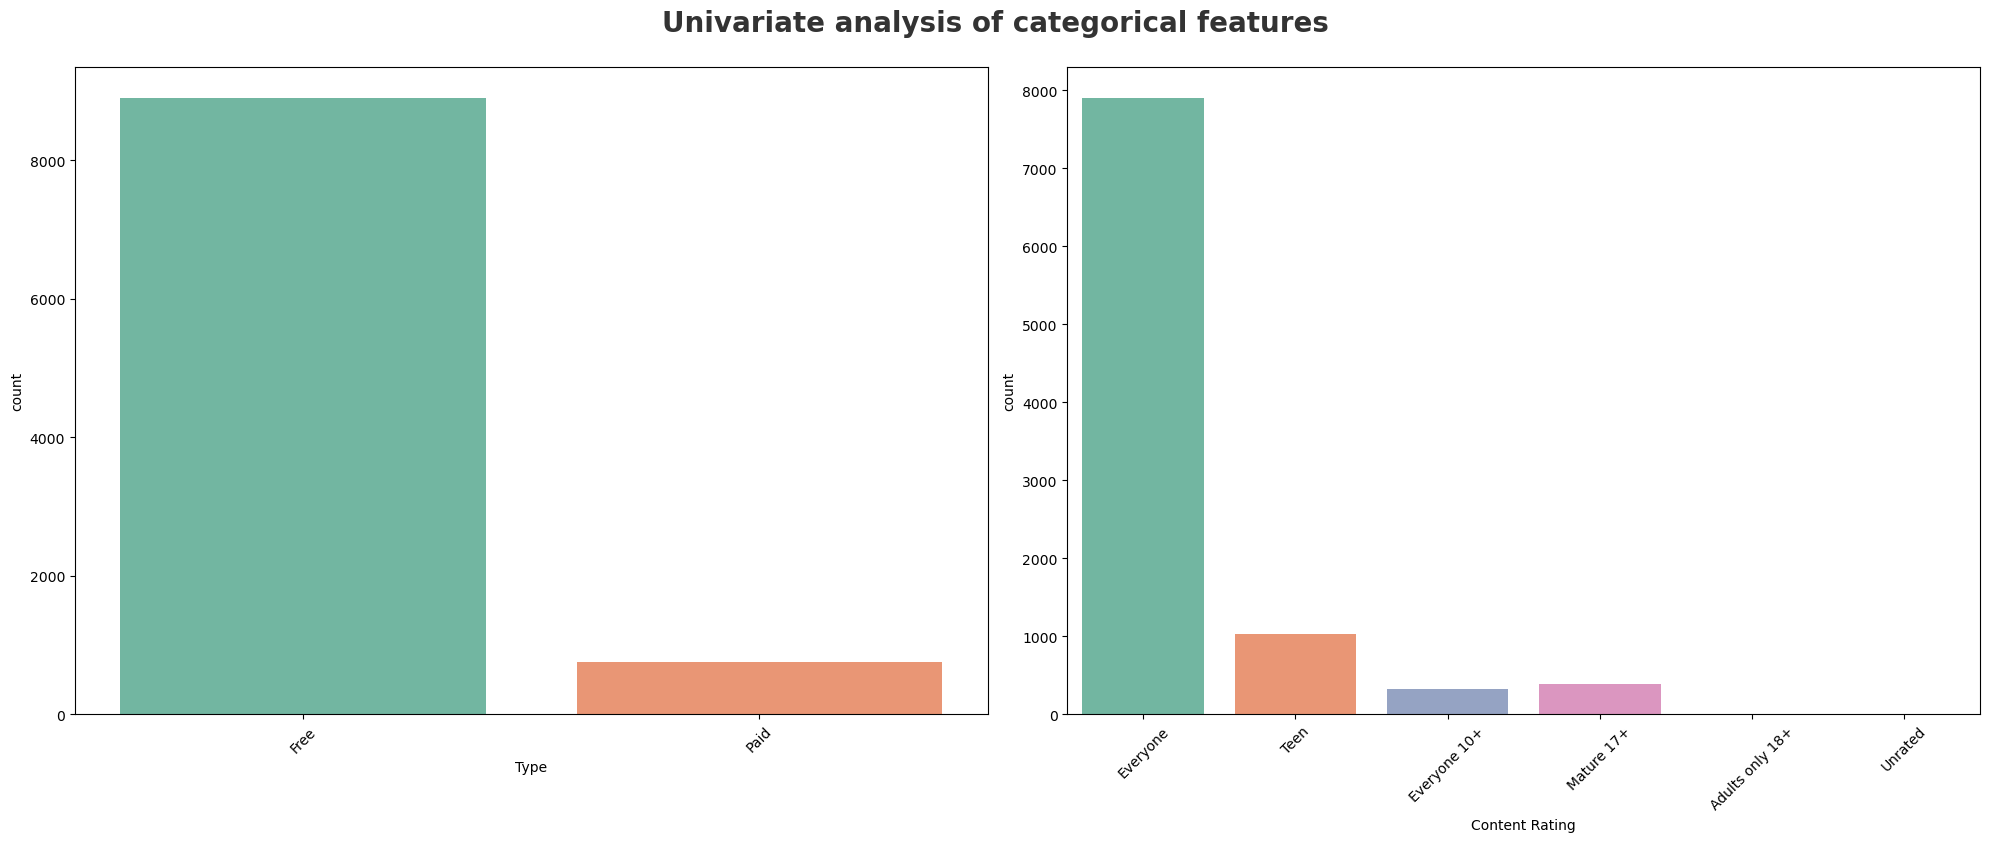

In [91]:
## categorical columns

plt.figure(figsize=(20,15))
plt.suptitle('Univariate analysis of categorical features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category = ['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_copy[category[i]],palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


### which is the most popular app category?


In [92]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_thousands,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19000.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14000.0,15,1,2018


<Axes: ylabel='count'>

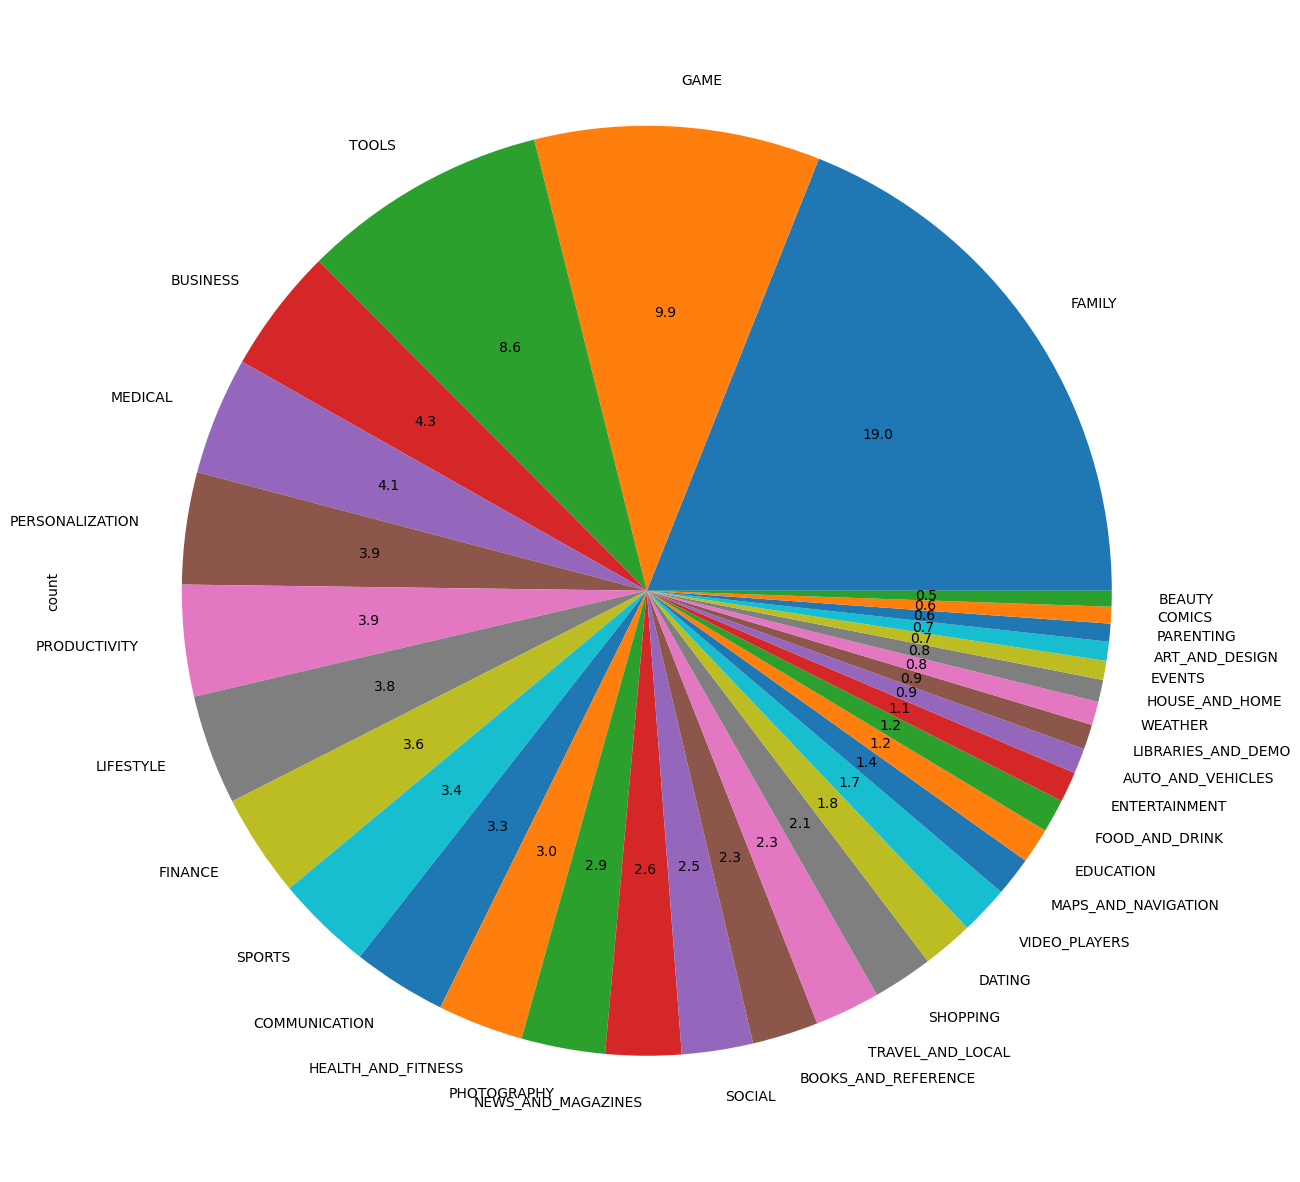

In [102]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

## Observation
1. There are more kinds of app in playstore which are under category of family,games & tools
2. Beauty, comics, arts and weather kinds of apps are very less in playstore

In [107]:
## Top 10 app categories 

Category = pd.DataFrame(df_copy['Category'].value_counts())
Category.rename(columns ={'Category': 'Count'}, inplace=True)
Category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


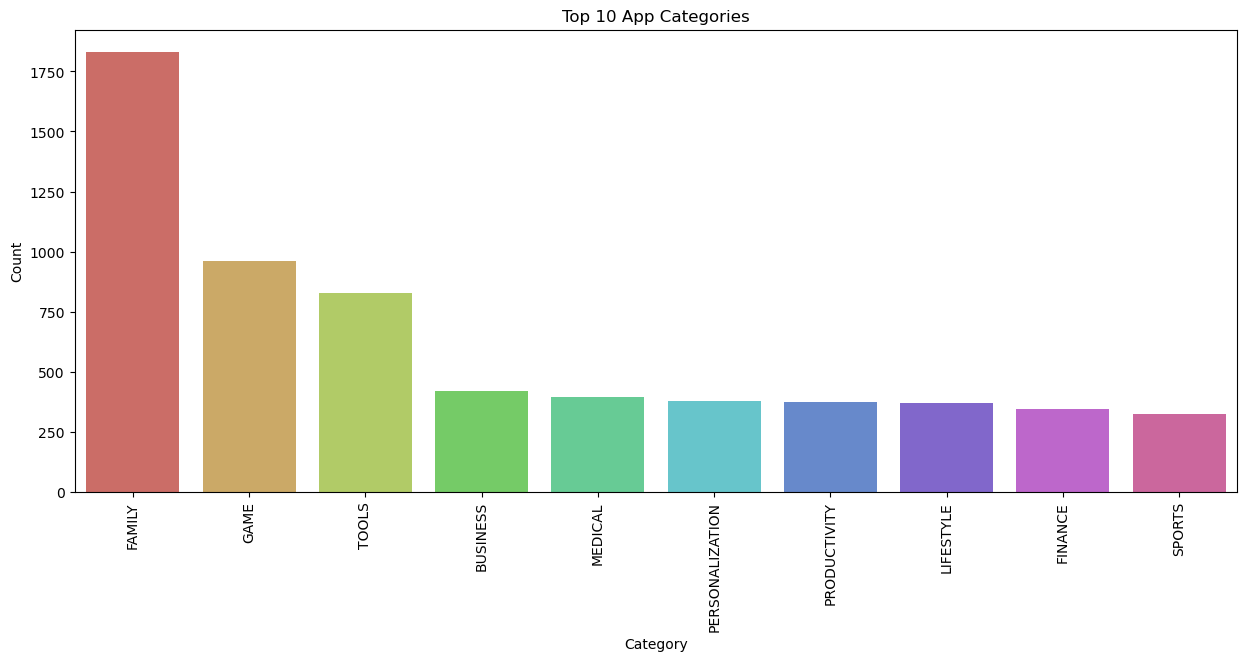

In [114]:
# top 10 apps 
category = df_copy['Category'].value_counts().reset_index()
category.columns = ['Category', 'Count']


plt.figure(figsize=(15,6))
sns.barplot(x='Category', y='Count', data=category[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()


## Insights 

1. Family apps has highest 18% share follow by games with 9.9%
2. least app category is beauty